# Jere Korhonen c115062 Final Assignment Lask2057 

In [1]:
#Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

In [2]:
#Read the file
df=pd.read_csv('bankruptcyData.csv',index_col=False)

In [3]:
#this shows if there are NaN values-> No NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10000 non-null  float64
 1   Attr2   10000 non-null  float64
 2   Attr3   10000 non-null  float64
 3   Attr4   10000 non-null  float64
 4   Attr5   10000 non-null  float64
 5   Attr6   10000 non-null  float64
 6   Attr7   10000 non-null  float64
 7   Attr8   10000 non-null  float64
 8   Attr9   10000 non-null  float64
 9   Attr10  10000 non-null  float64
 10  Attr11  10000 non-null  float64
 11  Attr12  10000 non-null  float64
 12  Attr13  10000 non-null  float64
 13  Attr14  10000 non-null  float64
 14  Attr15  10000 non-null  float64
 15  Attr16  10000 non-null  float64
 16  Attr17  10000 non-null  float64
 17  Attr18  10000 non-null  float64
 18  Attr19  10000 non-null  float64
 19  Attr20  10000 non-null  float64
 20  Attr21  10000 non-null  float64
 21  Attr22  10000 non-null  float64
 22 

In [4]:
#basic statistics 
df.describe()

Attr1         Attr2         Attr3         Attr4         Attr5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.007954     -0.007140     -0.003544      0.005005     -0.004687   
std        1.396405      1.409440      1.015494      0.908020      1.394750   
min       -9.474787   -140.604555    -25.597146     -0.381641   -138.720013   
25%       -0.079776     -0.055604     -0.516971     -0.192306      0.006798   
50%       -0.019204      0.000246      0.003186     -0.117972      0.007302   
75%        0.081218      0.056957      0.585722      0.022705      0.007753   
max      137.557872      2.004925      3.324327     60.825460     11.556238   

              Attr6         Attr7         Attr8         Attr9        Attr10  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.001455     -0.006963      0.009053      0.006763      0.007456   
std        1.286713      1.412509      1.064426      1.171199      1.407349   
min      -26.249562   -141.176615     -0.966015     -1.294340     -2.528495   
25%       -0.016047     -0.008018     -0.445667     -0.388184     -0.068584   
50%       -0.016047      0.004280     -0.260150     -0.307842      0.000253   
75%        0.016026      0.024222      0.098874      0.156638      0.070036   
max      121.354736      0.623095     47.504463     62.936396    140.123299   

       ...        Attr56        Attr57        Attr58        Attr59  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      0.009804      0.005208     -0.009751     -0.002655   
std    ...      0.017370      0.718682      0.026124      0.467139   
min    ...     -1.657288    -42.381245     -0.037484     -3.218490   
25%    ...      0.009315      0.003199     -0.010766     -0.022740   
50%    ...      0.009838      0.010013     -0.009924     -0.020438   
75%    ...      0.010693      0.019900     -0.009416     -0.014401   
max    ...      0.036727     37.405312      2.551674     27.969785   

             Attr60        Attr61        Attr62        Attr63        Attr64  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.004548      0.014331     -0.006864      0.020750     -0.003984   
std        1.252571      1.171160      0.277288      1.115182      0.930875   
min       -0.048598     -0.412525     -0.022204     -0.743297     -0.050969   
25%       -0.043418     -0.221237     -0.016847     -0.371384     -0.041603   
50%       -0.039928     -0.139653     -0.013821     -0.180311     -0.034319   
75%       -0.031820     -0.002210     -0.009476      0.133244     -0.020507   
max      117.341069     59.139158     23.970250     62.527240     90.774695   

              class  
count  10000.000000  
mean       0.020300  
std        0.141032  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 65 columns]

In [5]:
# Winsorize all the variables to get high and low values away
numer = df.columns[0:64]
df[numer] = df[numer].clip(lower=df[numer].quantile(0.025),upper=df[numer].quantile(0.975),axis=1)
print("After winsorizing")
print(df.describe())

After winsorizing
              Attr1         Attr2         Attr3         Attr4         Attr5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.003341      0.003475      0.016196     -0.034121      0.007271   
std        0.169494      0.078278      0.861997      0.263227      0.001859   
min       -0.431301     -0.134498     -1.995497     -0.304126      0.000943   
25%       -0.079776     -0.055604     -0.516971     -0.192306      0.006798   
50%       -0.019204      0.000246      0.003186     -0.117972      0.007302   
75%        0.081218      0.056957      0.585722      0.022705      0.007753   
max        0.429342      0.191124      1.840359      0.947504      0.013986   

              Attr6         Attr7         Attr8         Attr9        Attr10  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.003303      0.007516     -0.038355     -0.030164     -0.002589   
std        0.044675      0.032336

0    9797
1     203
Name: class, dtype: int64


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

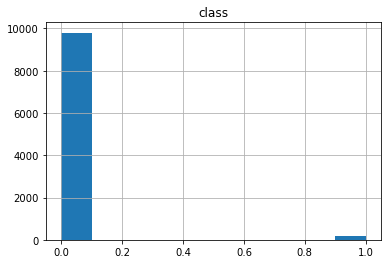

In [6]:
#Check how many companies have gone to bankrupt 1=bankrupt
print(df['class'].value_counts())
df.hist('class')

Change some column names

In [7]:
df=df.rename(columns={'Attr1': 'ROA','Attr19': 'GrossProfit%','Attr23':'NetProfit%','Attr33':'Op.Exp./Short-termLiabilities','Attr39': 'ProfitOnSales%','Attr47':'Inventory/CostOfProductsSold','Attr58': 'CostOfSalesRatio%'})

In [8]:
#Copied from Kaggle, Shows histograms of the dataset easily
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/var/folders/n3/lsk94q496hs_2rtbpj5bk6x80000gn/T/ipykernel_23274/1396574868.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


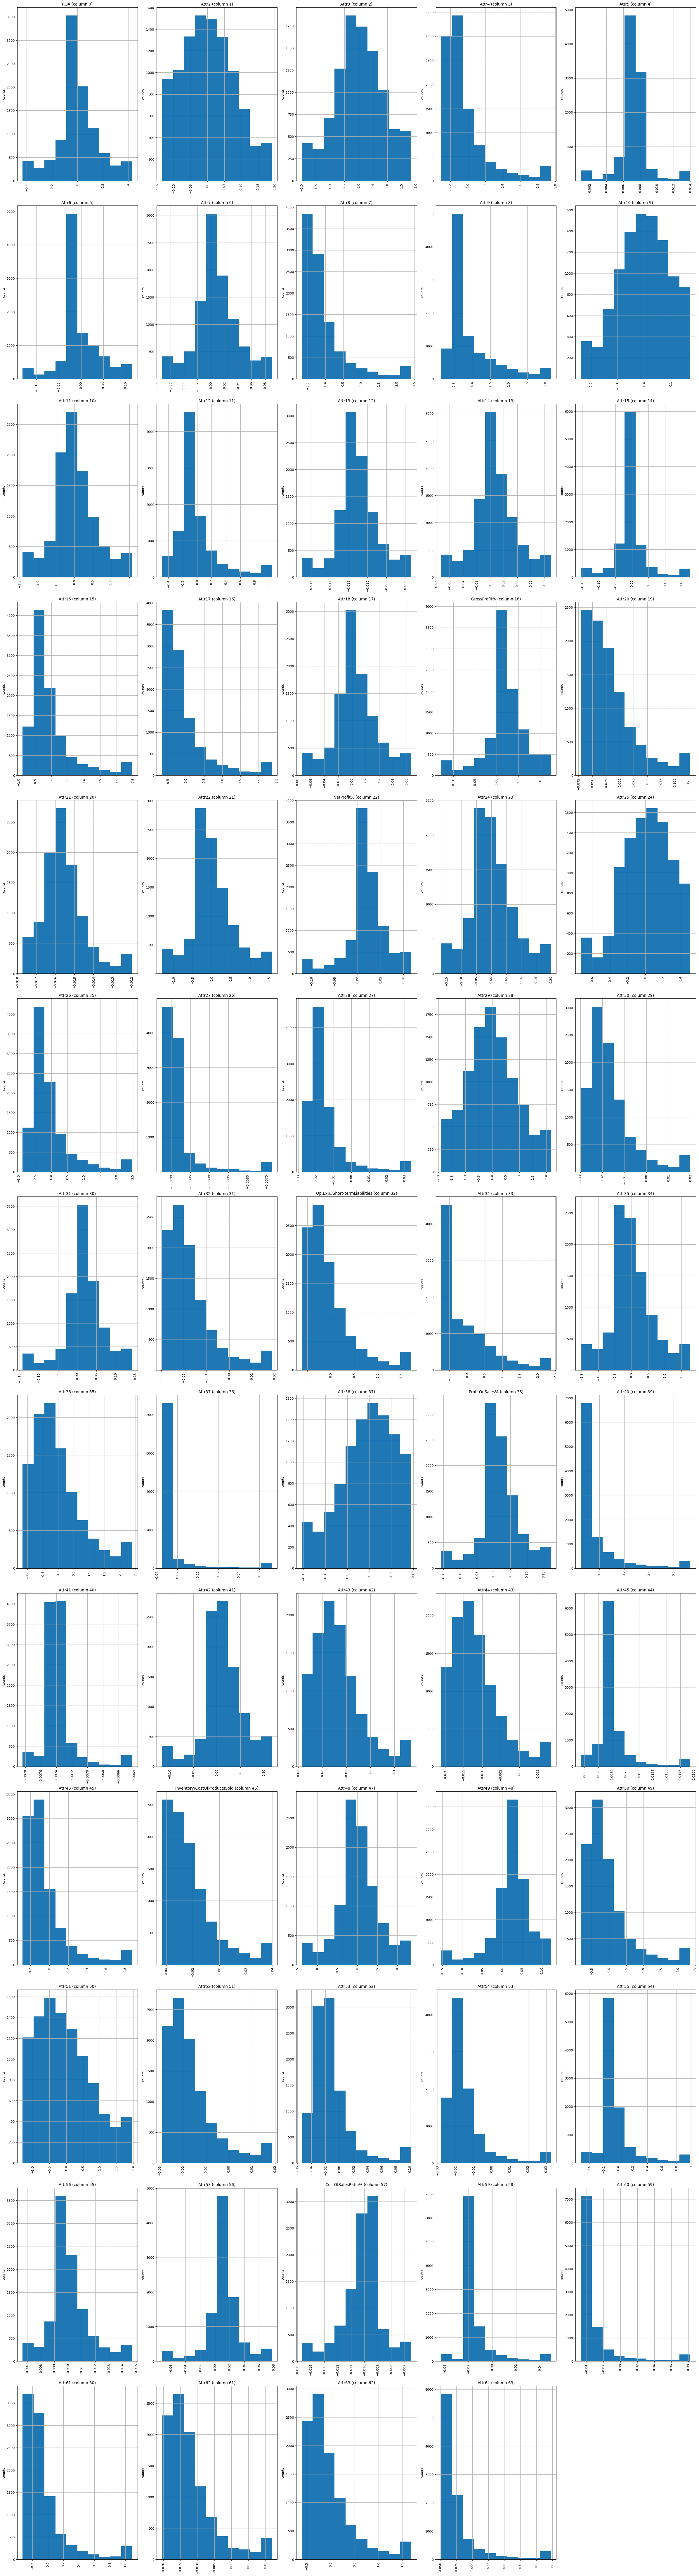

In [9]:
#Shows distribution of each variable in histogram
plotPerColumnDistribution(df, 64, 5)

Check the correlation between attributes

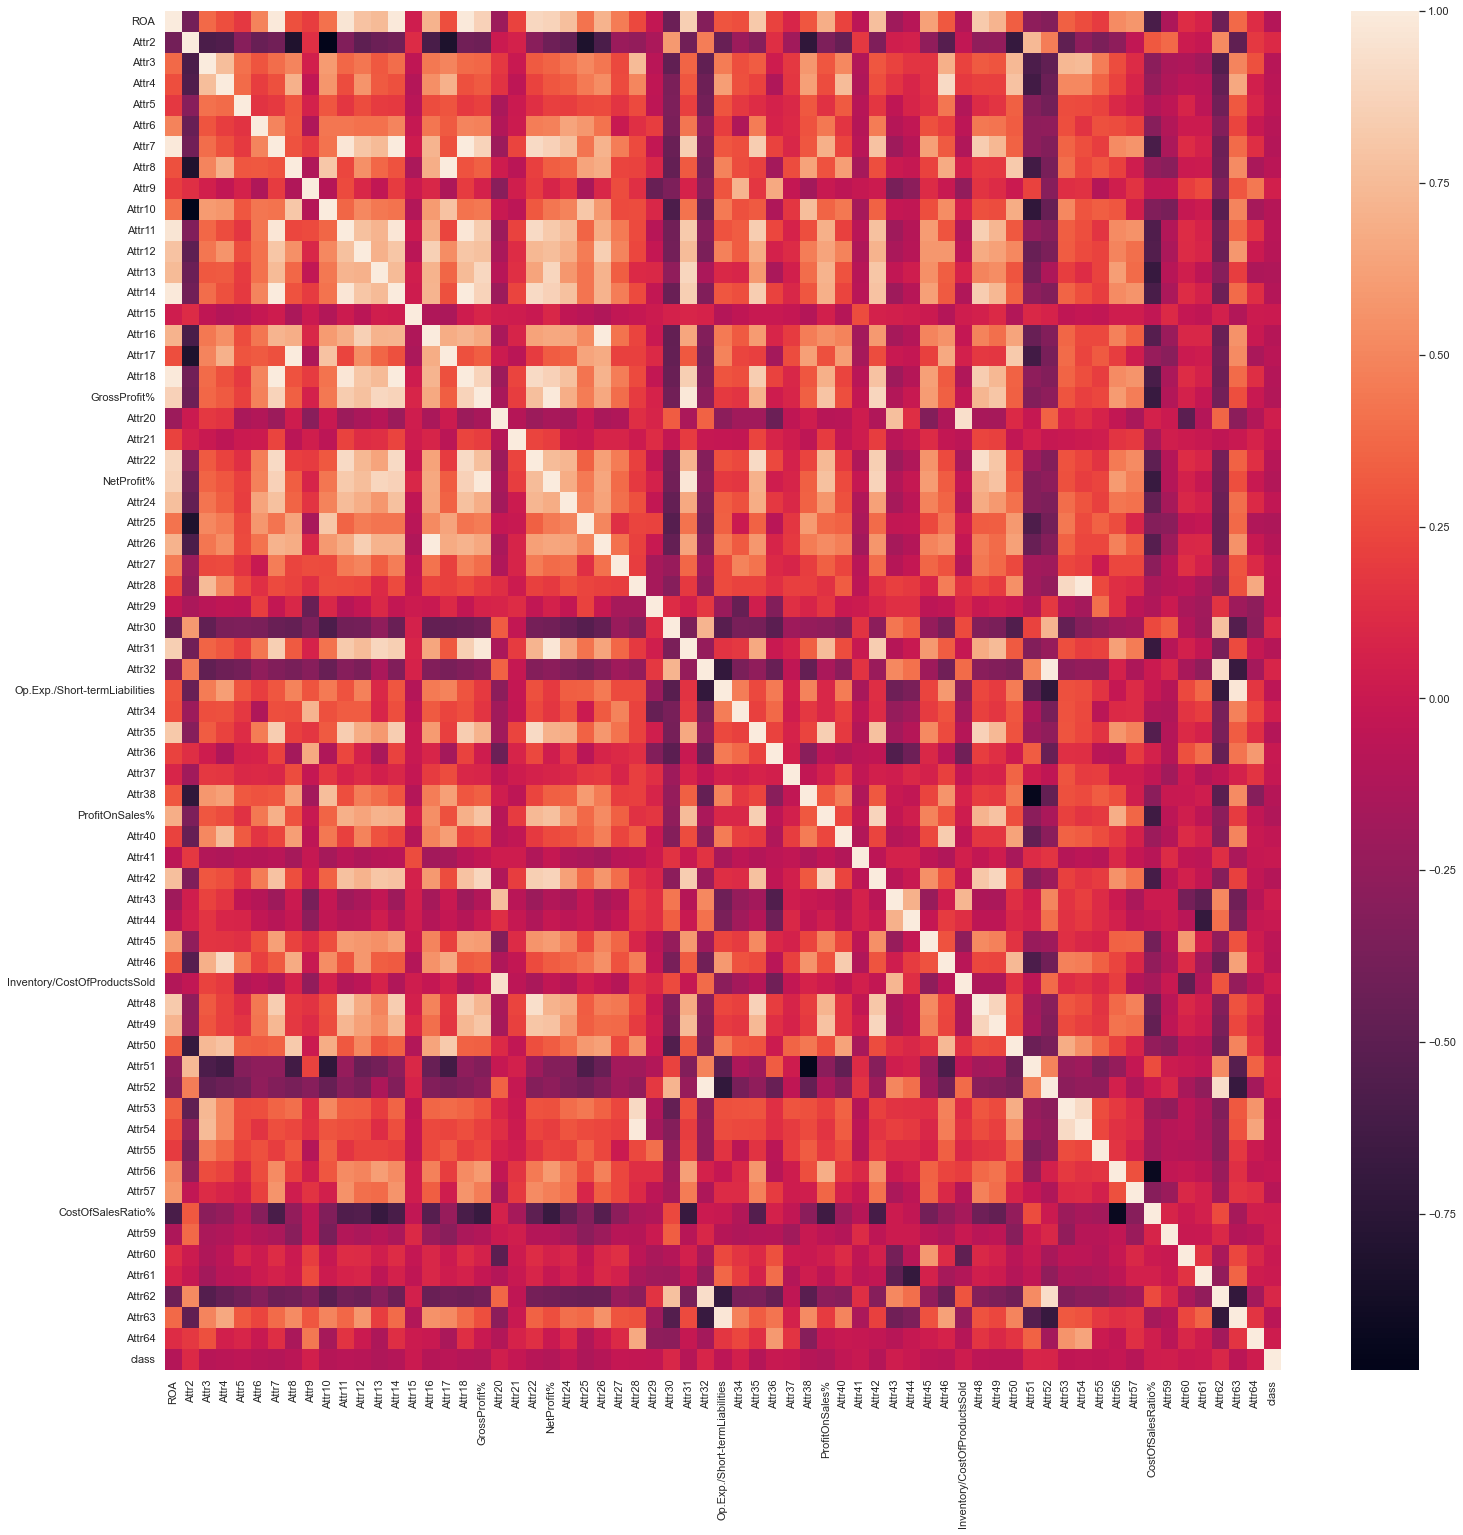

In [10]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(df.corr())
plt.show()

In [11]:
#Correlation with numbers.
df.corr()

ROA     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
ROA     1.000000 -0.392626  0.376830  0.273376  0.176396  0.484930  0.989882   
Attr2  -0.392626  1.000000 -0.585966 -0.567165 -0.303886 -0.448101 -0.398604   
Attr3   0.376830 -0.585966  1.000000  0.762716  0.408016  0.292689  0.390024   
Attr4   0.273376 -0.567165  0.762716  1.000000  0.389349  0.203131  0.280307   
Attr5   0.176396 -0.303886  0.408016  0.389349  1.000000  0.156884  0.181616   
...          ...       ...       ...       ...       ...       ...       ...   
Attr61  0.071133 -0.018081 -0.181048 -0.079831 -0.060052  0.015974  0.065127   
Attr62 -0.421564  0.518605 -0.543816 -0.466412 -0.412867 -0.314192 -0.427052   
Attr63  0.378682 -0.489259  0.492520  0.654389  0.306915  0.233227  0.382972   
Attr64  0.123916  0.175607  0.279059  0.045124  0.081197 -0.008937  0.134112   
class  -0.102733  0.104969 -0.084019 -0.068588 -0.057054 -0.086286 -0.100746   

           Attr8     Attr9    Attr10  ...    Attr56    Attr57  \
ROA     0.281624  0.198150  0.410837  ...  0.528456  0.570042   
Attr2  -0.809194  0.135640 -0.977197  ... -0.267335 -0.036169   
Attr3   0.497507  0.049108  0.593199  ...  0.260557  0.118755   
Attr4   0.706396 -0.040757  0.569493  ...  0.223454  0.074215   
Attr5   0.297463  0.062188  0.303517  ...  0.099736  0.038283   
...          ...       ...       ...  ...       ...       ...   
Attr61  0.018844  0.256891  0.014841  ... -0.057651  0.057240   
Attr62 -0.403315 -0.326892 -0.515722  ... -0.214297 -0.179907   
Attr63  0.528382  0.298534  0.491472  ...  0.137656  0.163668   
Attr64 -0.145515  0.441958 -0.163035  ... -0.041737  0.136099   
class  -0.068866  0.042354 -0.094236  ... -0.026151 -0.083941   

        CostOfSalesRatio%    Attr59    Attr60    Attr61    Attr62    Attr63  \
ROA             -0.597649 -0.132653  0.119860  0.071133 -0.421564  0.378682   
Attr2            0.309037  0.374747  0.011560 -0.018081  0.518605 -0.489259   
Attr3           -0.284508 -0.136730 -0.121967 -0.181048 -0.543816  0.492520   
Attr4           -0.243425 -0.113198 -0.061243 -0.079831 -0.466412  0.654389   
Attr5           -0.117896 -0.056794  0.079371 -0.060052 -0.412867  0.306915   
...                   ...       ...       ...       ...       ...       ...   
Attr61           0.051192 -0.000504  0.150483  1.000000 -0.252763  0.353414   
Attr62           0.253963  0.101223 -0.145765 -0.252763  1.000000 -0.711377   
Attr63          -0.163577 -0.102995  0.235562  0.353414 -0.711377  1.000000   
Attr64           0.036108 -0.080408  0.091508  0.022187 -0.174972  0.161890   
class            0.033600  0.038889 -0.003888  0.007192  0.095095 -0.070261   

          Attr64     class  
ROA     0.123916 -0.102733  
Attr2   0.175607  0.104969  
Attr3   0.279059 -0.084019  
Attr4   0.045124 -0.068588  
Attr5   0.081197 -0.057054  
...          ...       ...  
Attr61  0.022187  0.007192  
Attr62 -0.174972  0.095095  
Attr63  0.161890 -0.070261  
Attr64  1.000000  0.020854  
class   0.020854  1.000000  

[65 rows x 65 columns]

In [12]:
#Check differences between bankrupycy and good companies. 
df.groupby('class').mean()

ROA     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
class                                                                         
0     -0.000834  0.002293  0.026621 -0.031523  0.007287 -0.002748  0.007985   
1     -0.124300  0.060554 -0.486912 -0.159538  0.006535 -0.030082 -0.015114   

          Attr8     Attr9    Attr10  ...    Attr55    Attr56    Attr57  \
class                                ...                                 
0     -0.031875 -0.034160 -0.001266  ... -0.031870  0.010105  0.011115   
1     -0.351043  0.162729 -0.066445  ... -0.120619  0.009823 -0.003284   

       CostOfSalesRatio%    Attr59    Attr60    Attr61    Attr62    Attr63  \
class                                                                        
0              -0.010166 -0.015645 -0.031371 -0.053410 -0.012080 -0.032566   
1              -0.009807 -0.011443 -0.032062 -0.038887 -0.007293 -0.279708   

         Attr64  
class            
0     -0.023089  
1     -0.018060  

[2 rows x 64 columns]

In [13]:
#This dataframe is only analysis purposes for example adding new columns. I will use the df dataframe to Machine learning modelling
dfA=df

Seaborn analysis

In [14]:
#Not a good visualization and takes a lot of time to load
#We can see a upward trend between ROA and ProfitOnSales%
#sns.boxenplot(x="ROA", y="ProfitOnSales%", data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

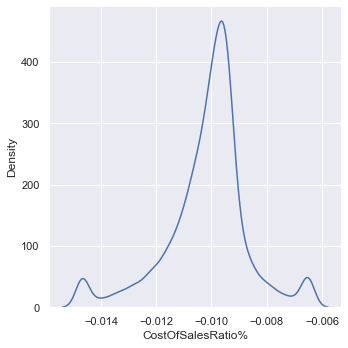

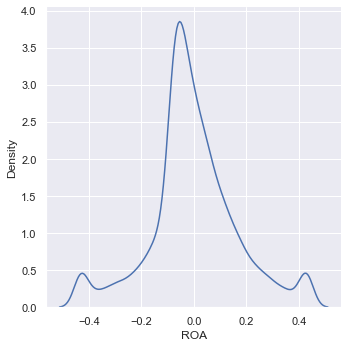

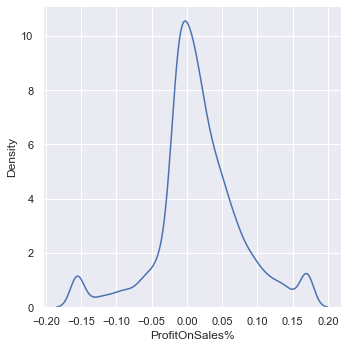

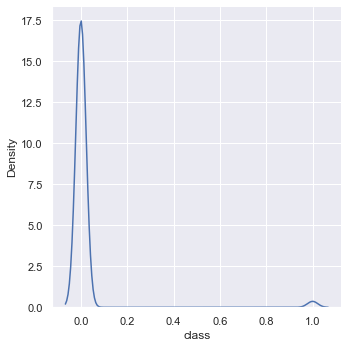

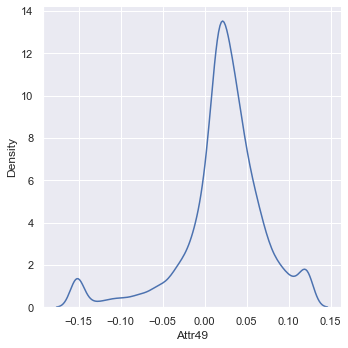

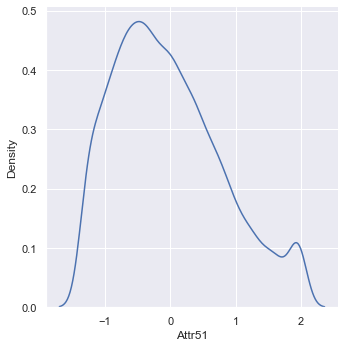

In [15]:
#SHow different displots
sns.displot(dfA['CostOfSalesRatio%'],kind='kde')
sns.displot(dfA['ROA'],kind='kde')
sns.displot(dfA['ProfitOnSales%'],kind='kde')
sns.displot(dfA['class'],kind='kde')
sns.displot(dfA['Attr49'],kind='kde')
sns.displot(dfA['Attr51'],kind='kde')
plt.show

In [16]:
#Takes a lot of time or does not work... This could show us which variables can classify bankruptcy companies....
#sns.pairplot(df, hue="class", diag_kind='kde', height=1.7);

In [17]:
#Divide a attr51 - short-term liabilities / total assets to equal 4 groups
#Same to the GrossProfit%
dfA['51']=pd.qcut(df["Attr51"], 4)
dfA['19']=pd.qcut(df["GrossProfit%"], 4)

In [18]:
#Checking that attr51 - short-term liabilities / total assets is really divided and a new column added
dfA['51']

0       (-1.3039999999999998, -0.671]
1                     (-0.144, 0.493]
2                     (-0.144, 0.493]
3                    (-0.671, -0.144]
4                    (-0.671, -0.144]
                    ...              
9995                  (-0.144, 0.493]
9996    (-1.3039999999999998, -0.671]
9997                   (0.493, 1.968]
9998    (-1.3039999999999998, -0.671]
9999                 (-0.671, -0.144]
Name: 51, Length: 10000, dtype: category
Categories (4, interval[float64, right]): [(-1.3039999999999998, -0.671] < (-0.671, -0.144] < (-0.144, 0.493] < (0.493, 1.968]]

<function matplotlib.pyplot.show(close=None, block=None)>

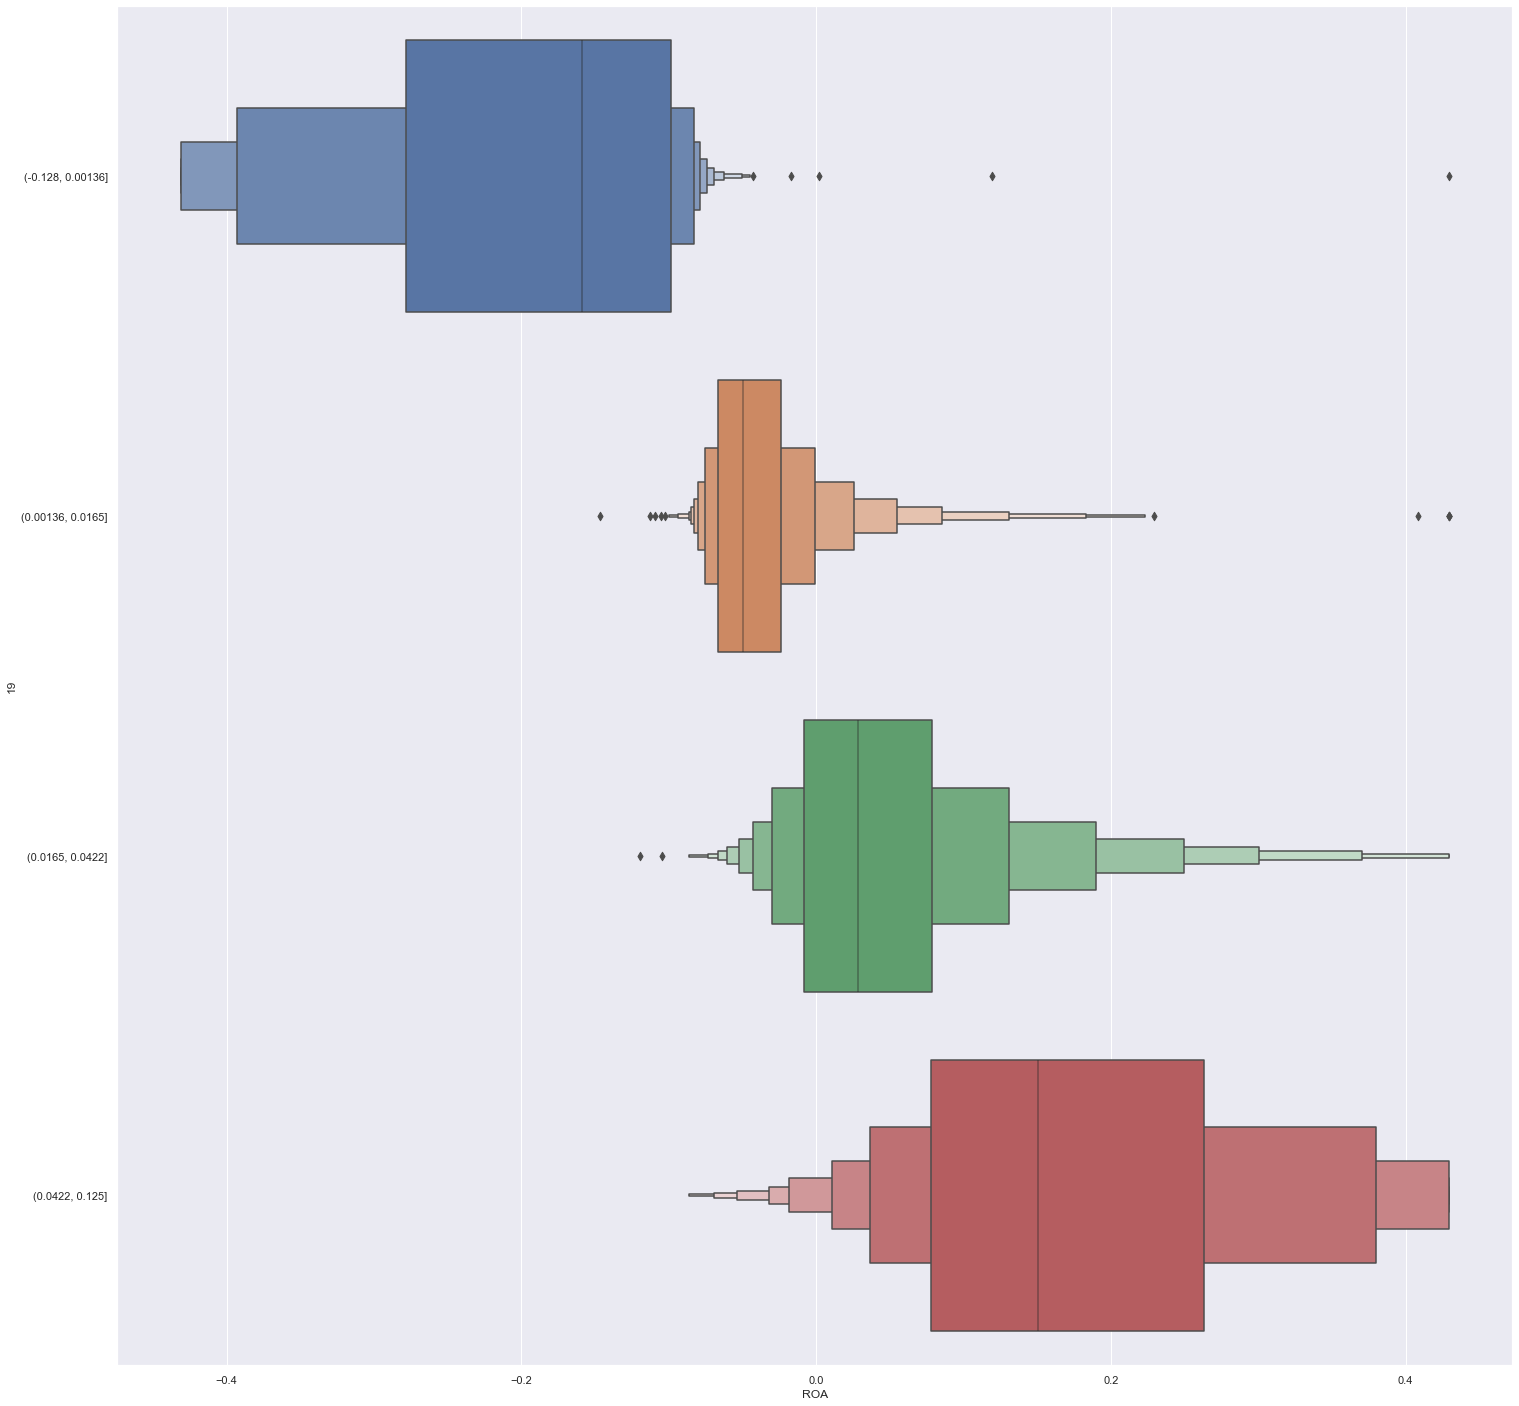

In [19]:
#Boxenplot represents the distribution  selected features. In this case GrossProfit% is divided into 4 equal size groups
#We can see correlation between features
sns.boxenplot(x="ROA", y="19", data=dfA)
plt.show

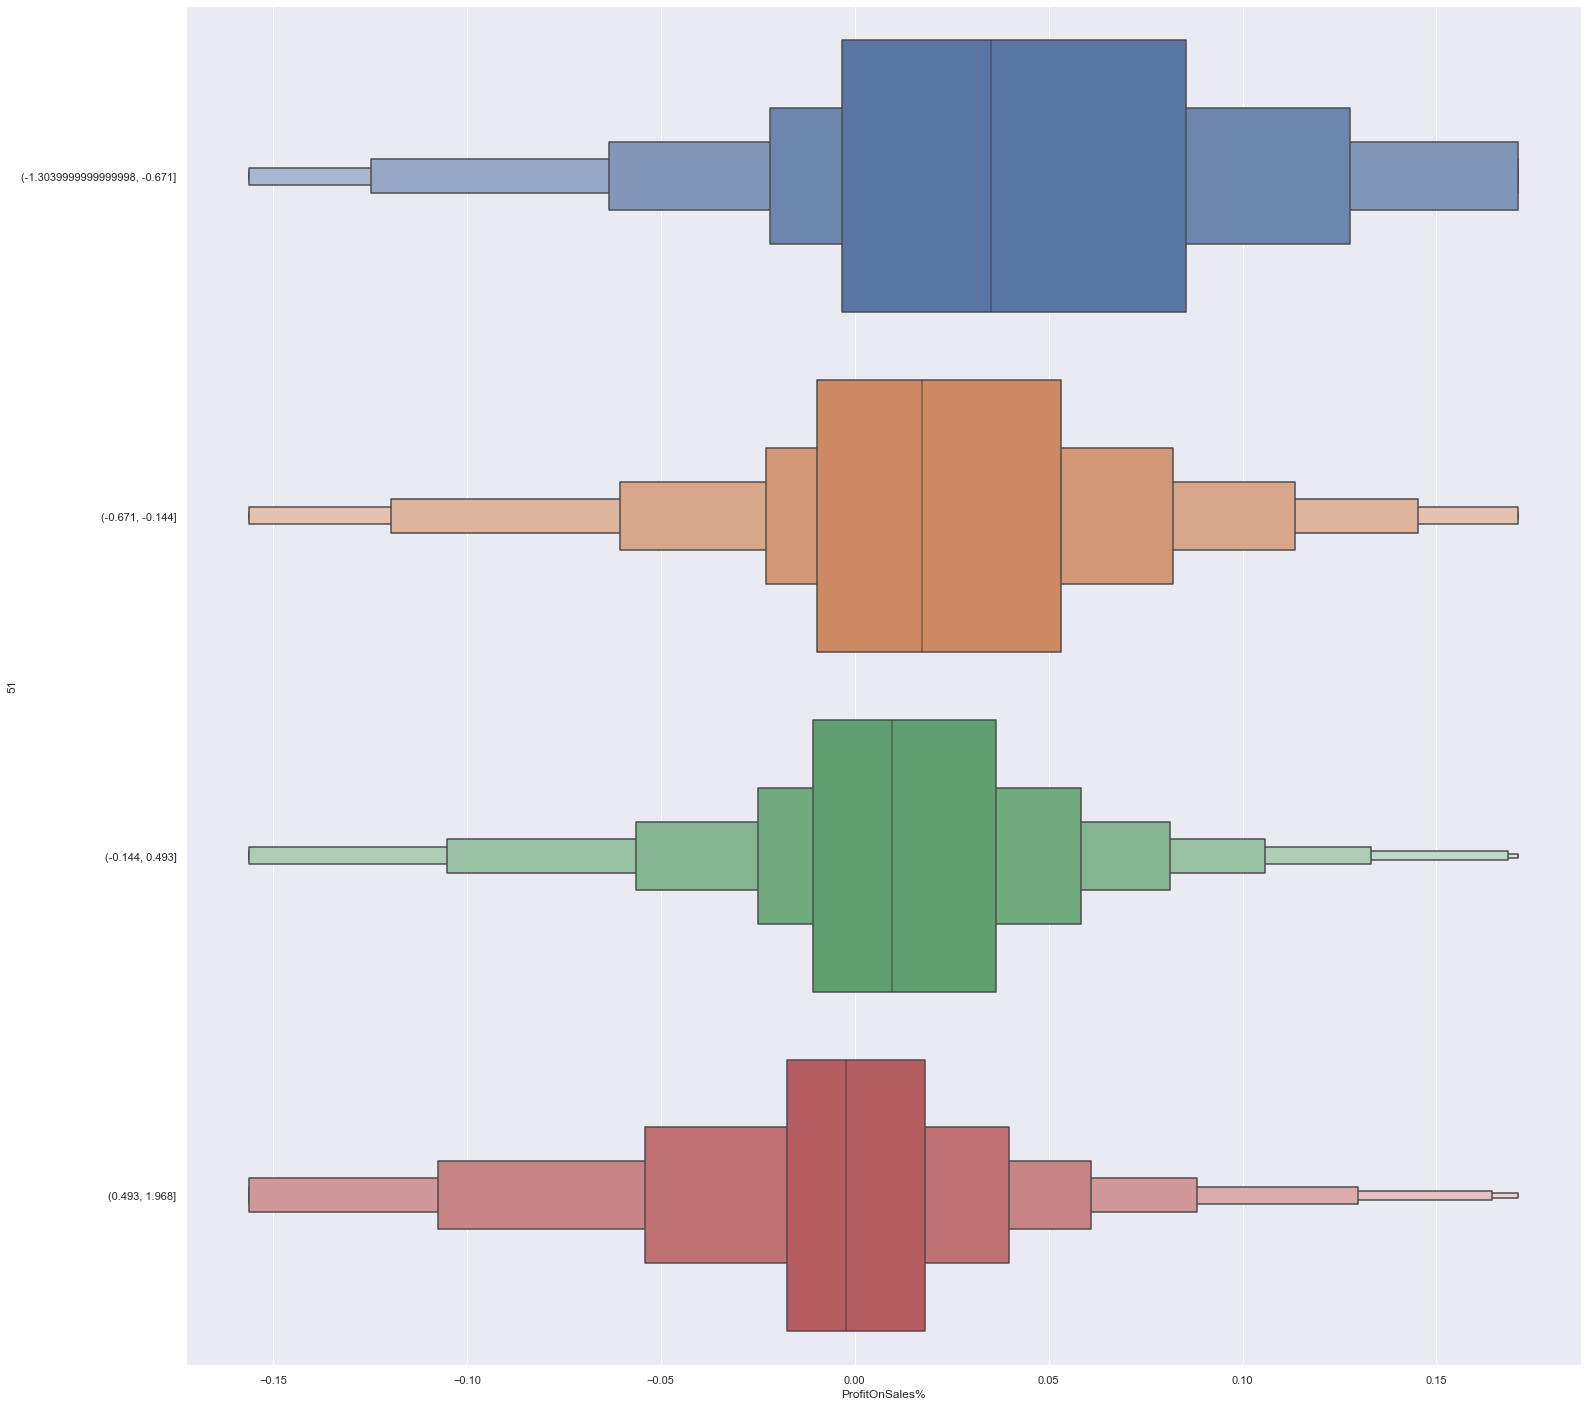

In [20]:
sns.boxenplot(x="ProfitOnSales%", y="51", data=dfA)
plt.show()
#Seems that Profit% is higher if short-term liabilities / total assets Attr51 is smaller -> There are not much short term liabilites.

<AxesSubplot:xlabel='CostOfSalesRatio%', ylabel='19'>

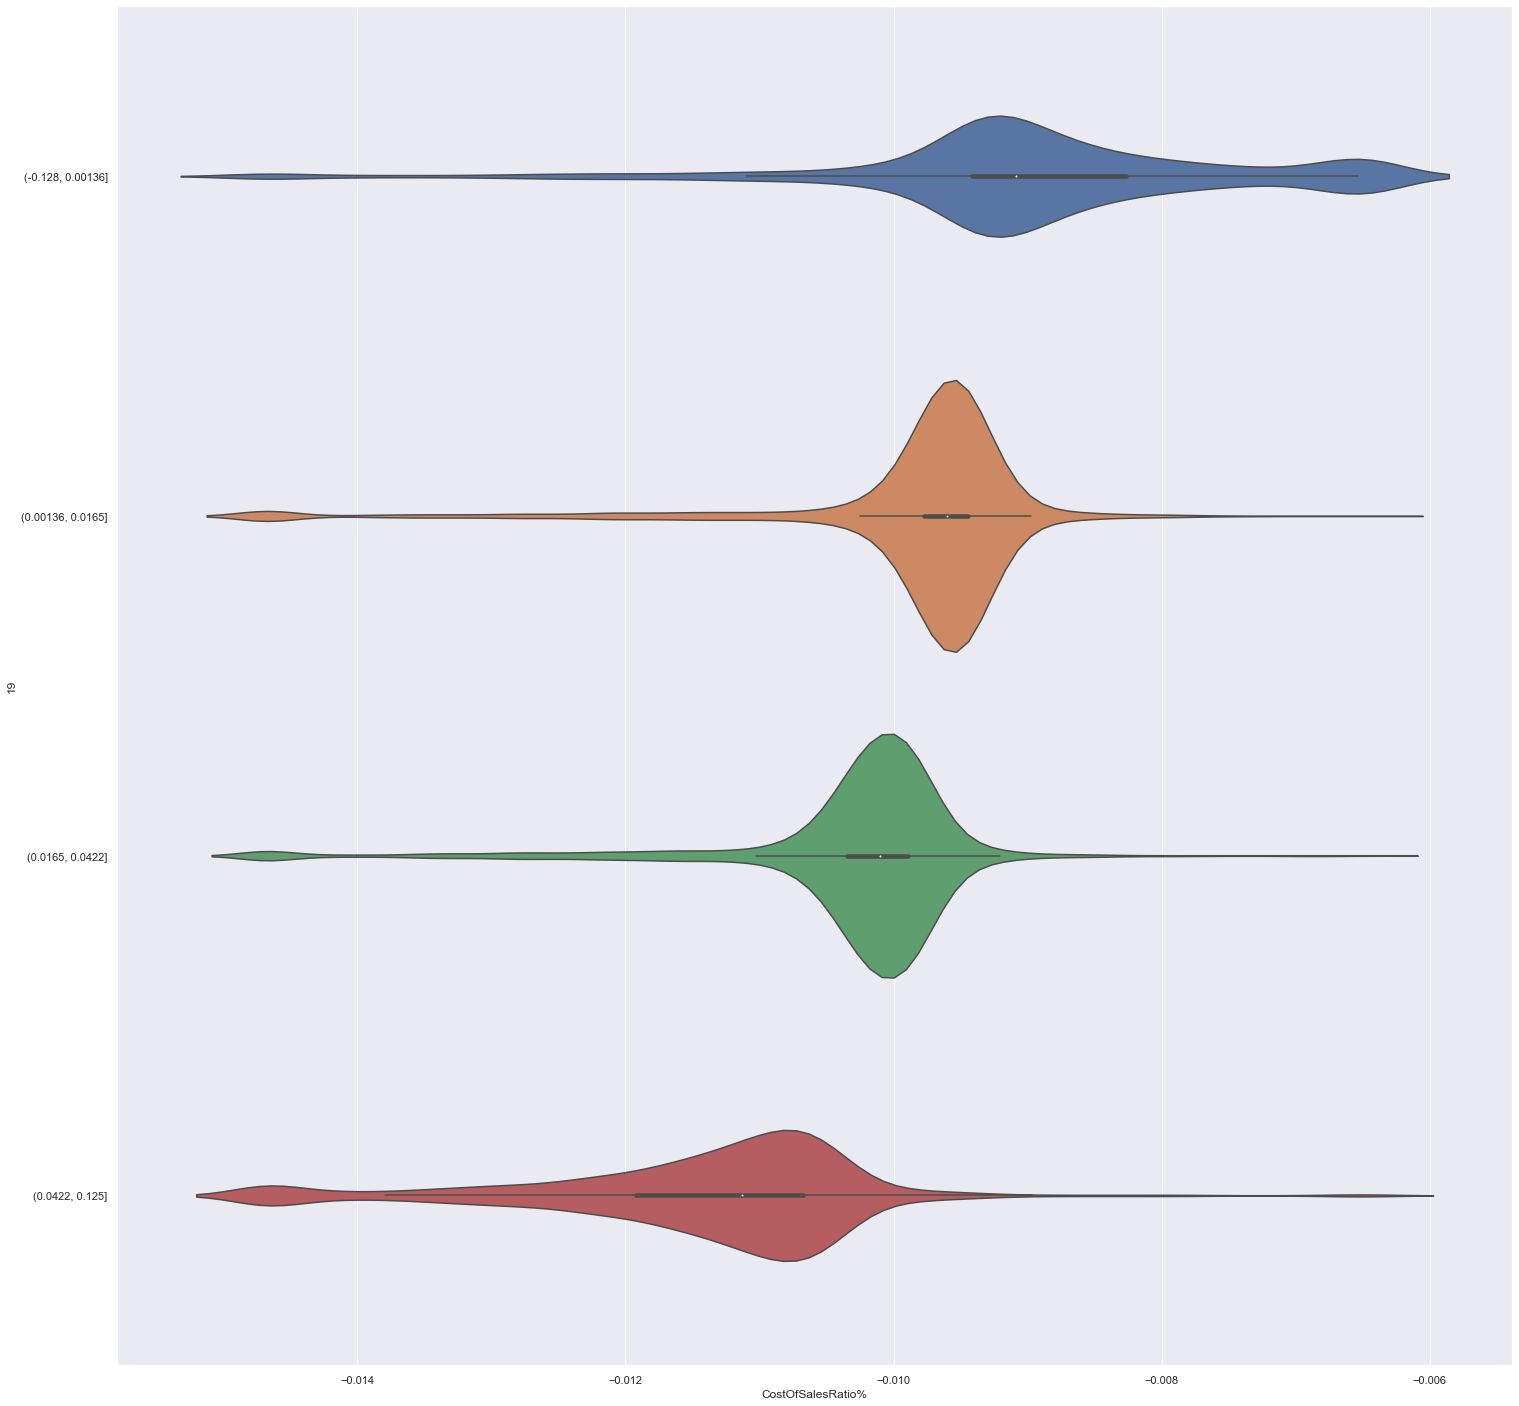

In [21]:
#Shows distribution
sns.violinplot(x='CostOfSalesRatio%', y=df['19'], data=dfA)
#If the profit% is lower the cost of sales seems to be higher. 

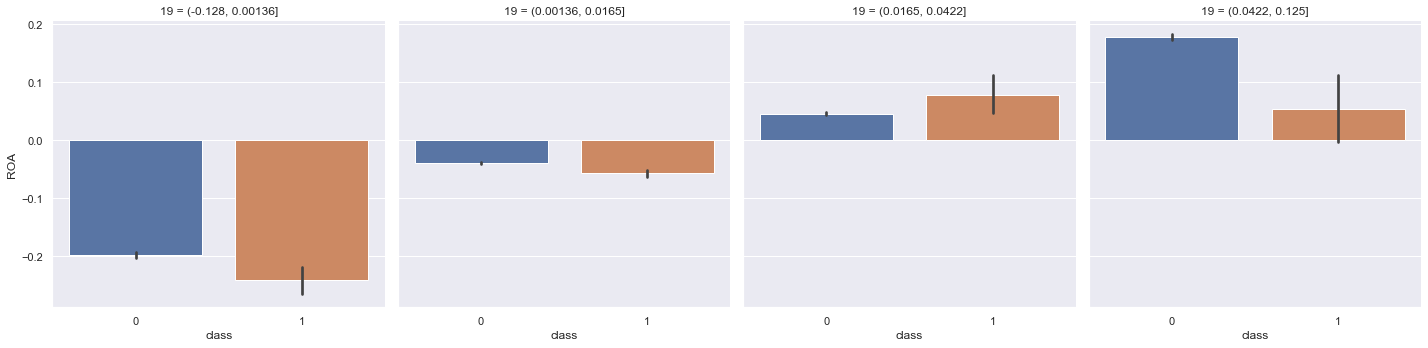

In [22]:
#GrossProfit% is divided to 4 equal amount groups then we have y-axis= Return of Assets and X-axis is 0 and 1 which means if the comapny has gone to bankruptcy
#We can see that if grossprofit% and ROA are high the less companies have failed. 
sns.catplot(x='class',y='ROA',col='19',kind='bar',data=dfA)
plt.show()

Regression line models by Seaborn library

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attr59', ylabel='ROA'>

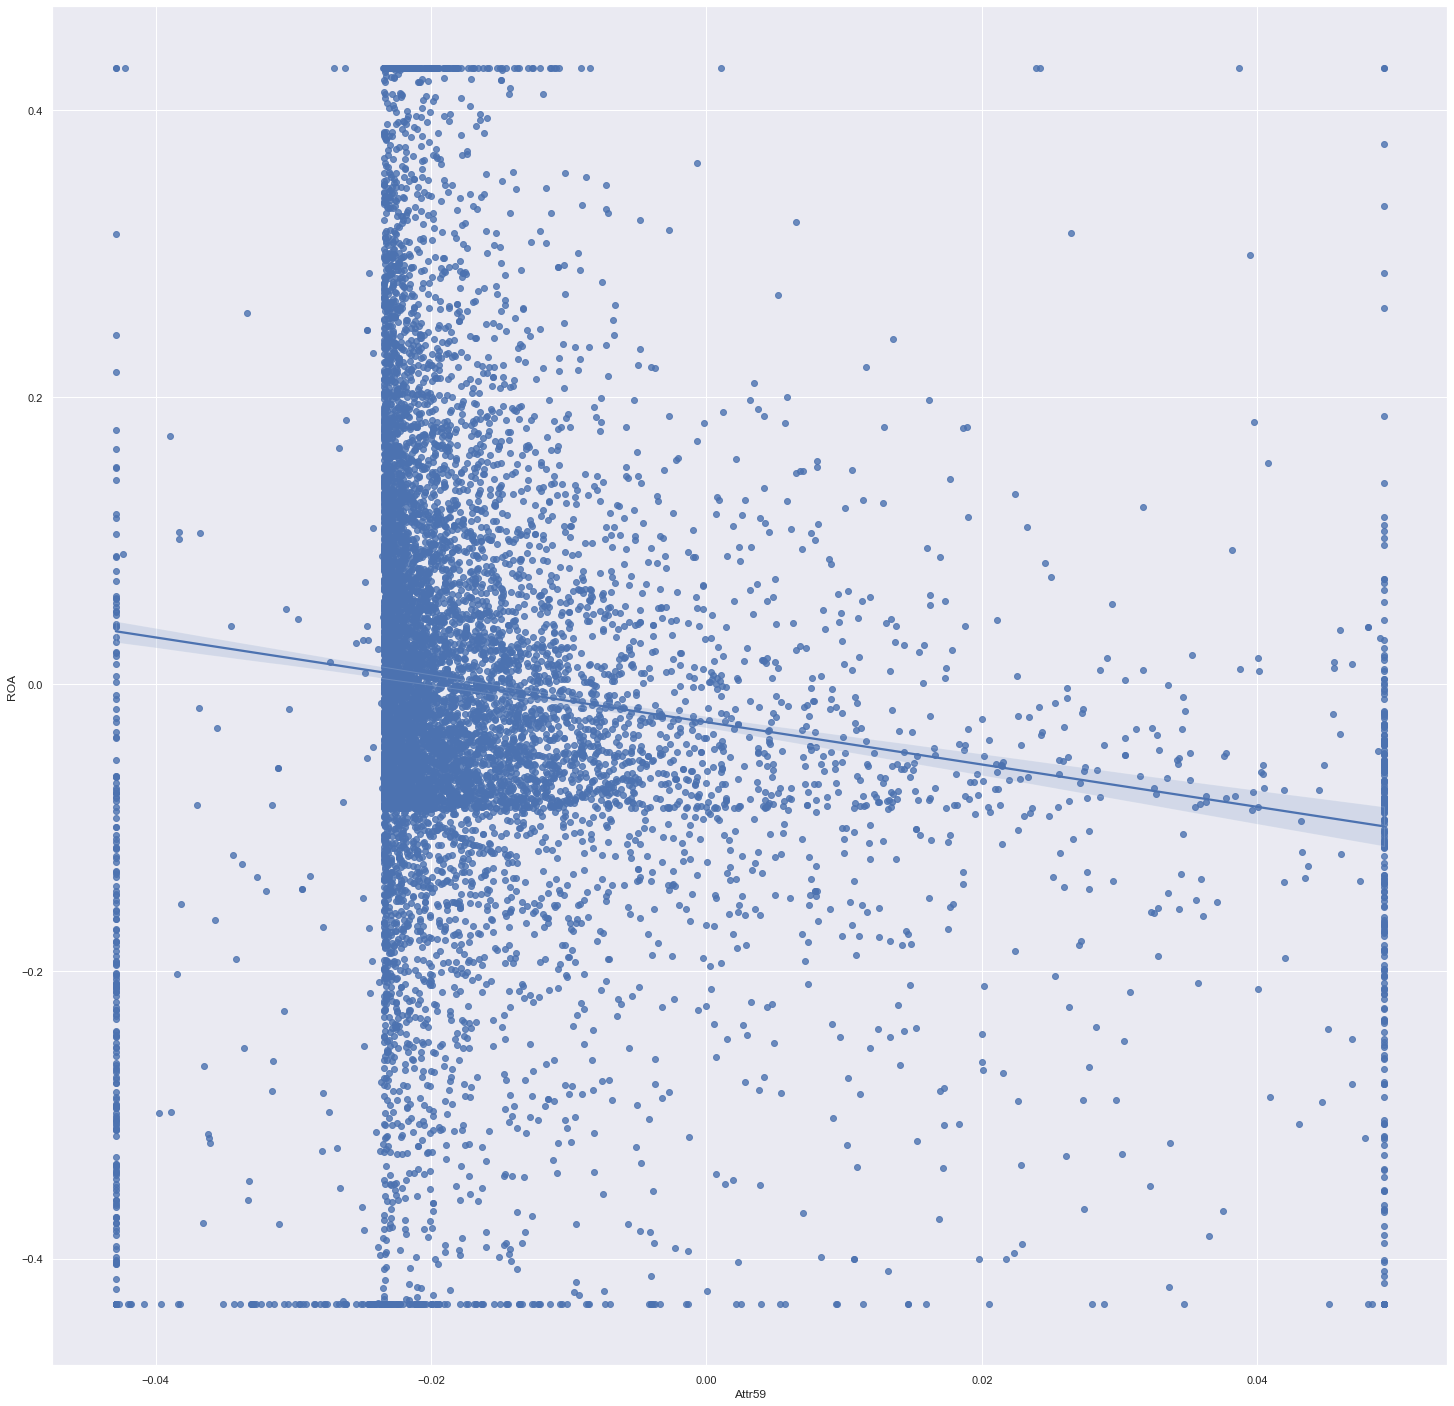

In [23]:
sns.regplot('Attr59','ROA',data=df)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attr25', ylabel='Attr20'>

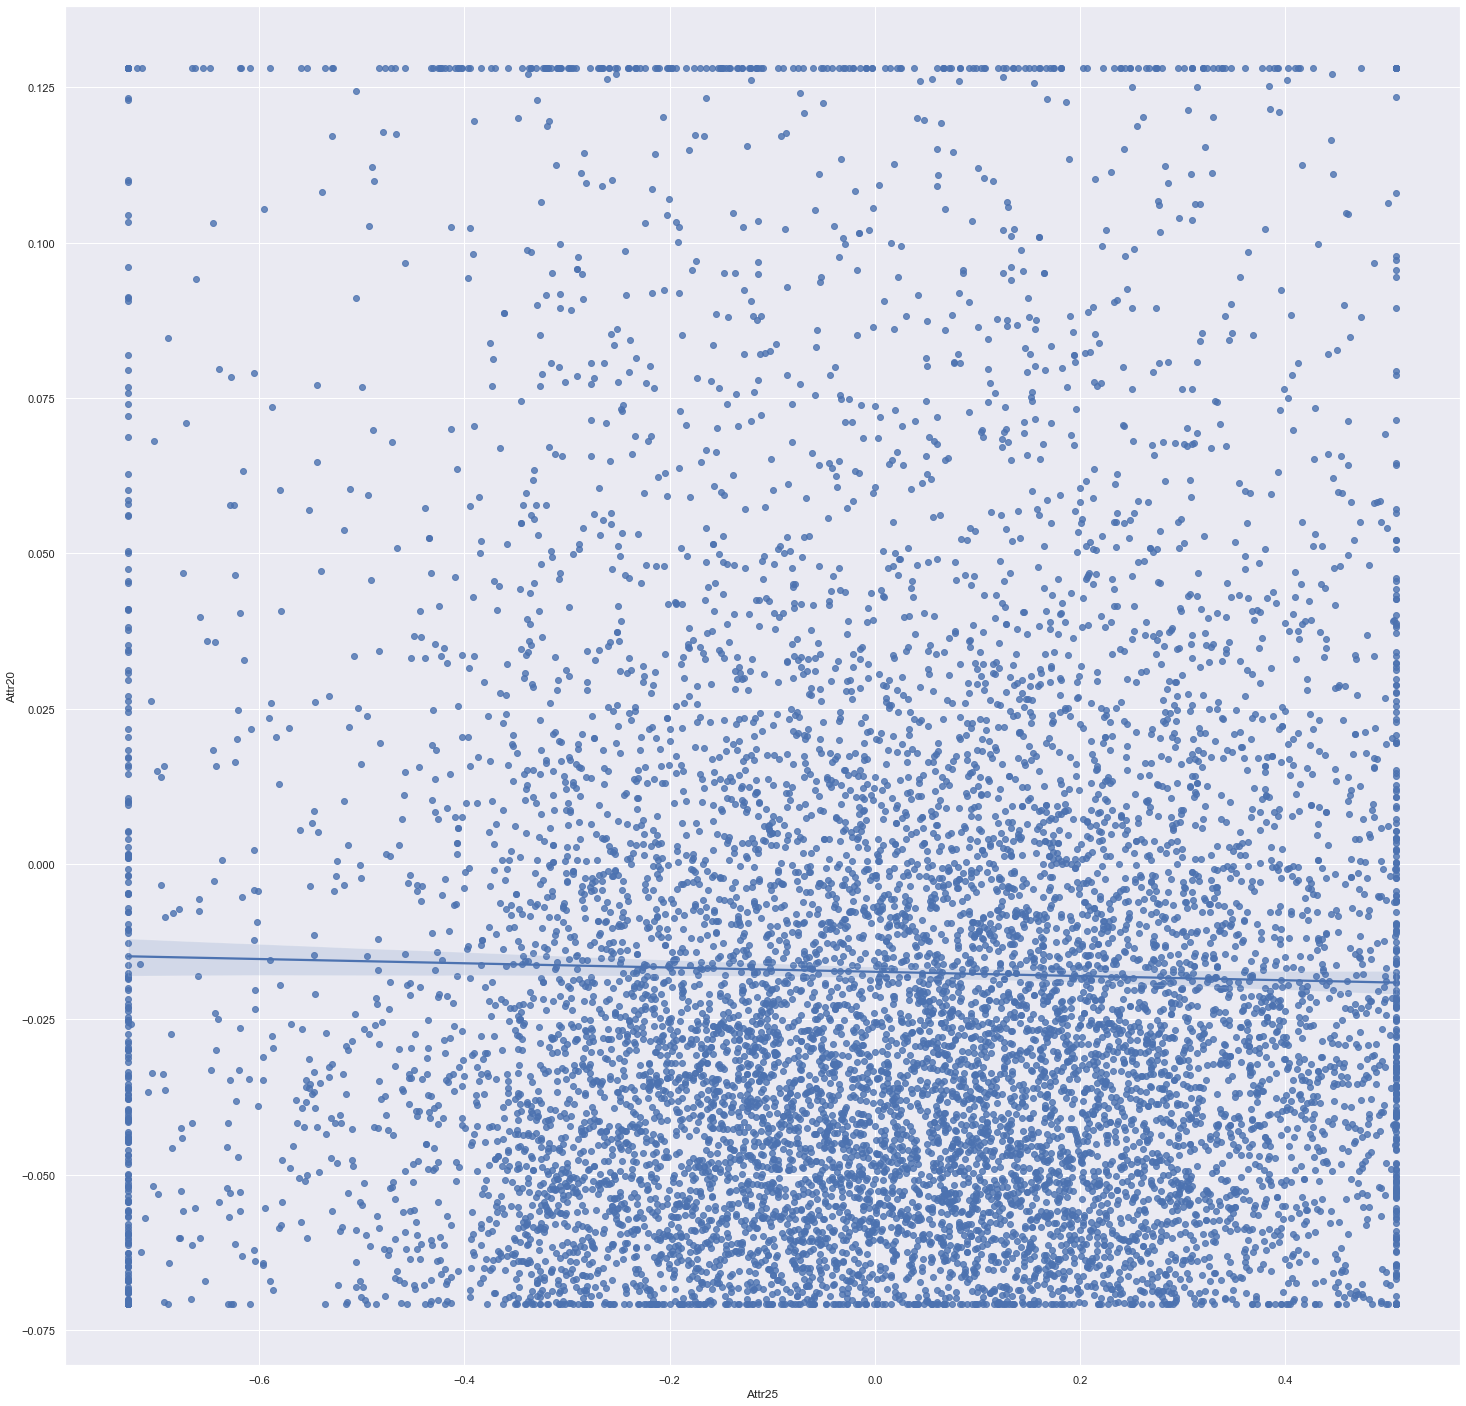

In [24]:
#attr25 - (equity - share capital) / total assets
#attr20 - (inventory * 365) / sales

sns.regplot('Attr25','Attr20',data=df)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProfitOnSales%', ylabel='ROA'>

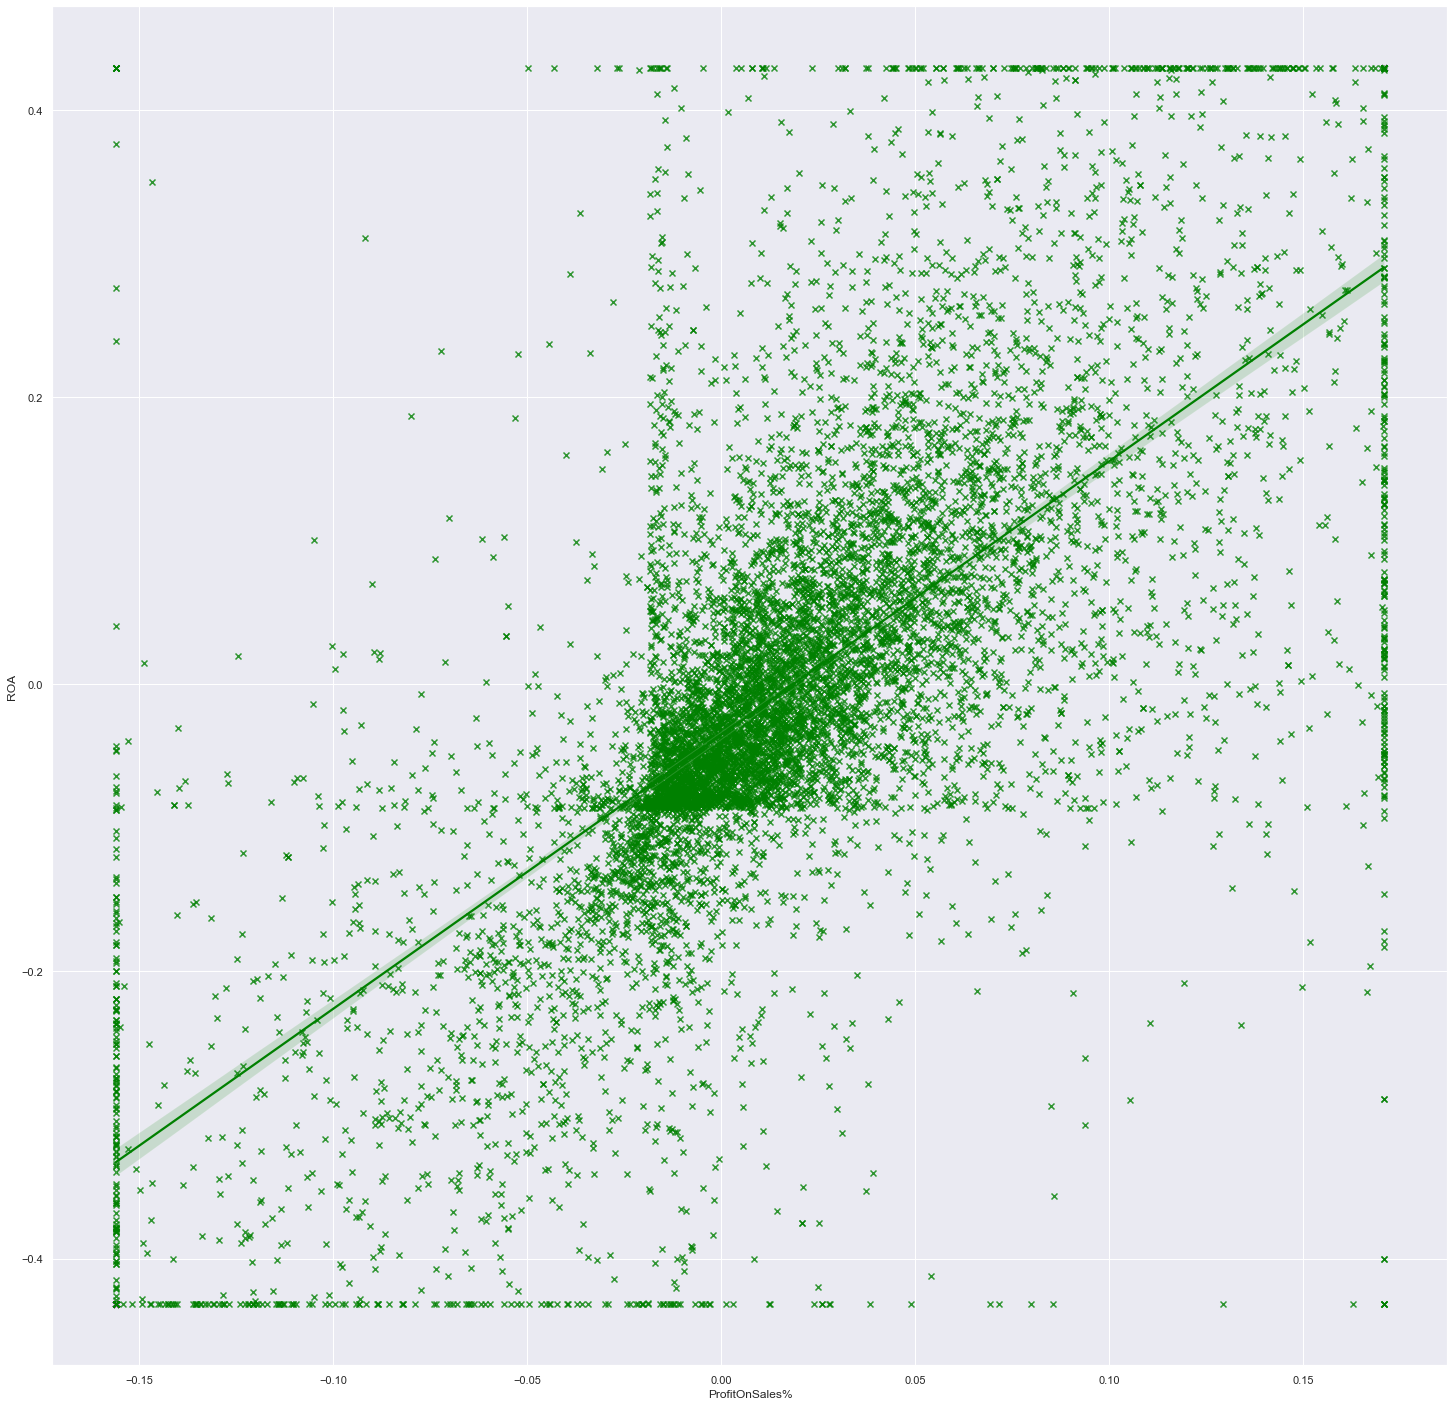

In [25]:
#Shows linear regression model based on the data points between Profit on sale% & Return of assets.
#there is clear connection between these features
sns.regplot('ProfitOnSales%','ROA',data=df,color='green',marker='x')

As you can see all the datapoints are very distributed when comparing two columns. 

# Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA
XPCA= df.iloc[: , :65]
#Do PCA with 10 first compnents        
pca=PCA(n_components=10)
projectedD=pca.fit_transform(XPCA)
#Check projectedD and pca.explained_variance_ratio_
projectedD
pca.explained_variance_ratio_
principalDataframe = pd.DataFrame(data = projectedD, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
#parameter returns a vector of the variance explained by each dimension.
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.38900512 0.2006241  0.12428212 0.06468035 0.05764241 0.04559999
 0.03880851 0.02093859 0.01280456 0.00797772]
0.9623634622266354


Not one or two PCA components describe enough variance. Maybe 6 or 7 would be enough.  As we can see 10 components get 96%. PCA removes the most unneeded features (the lowest importance).

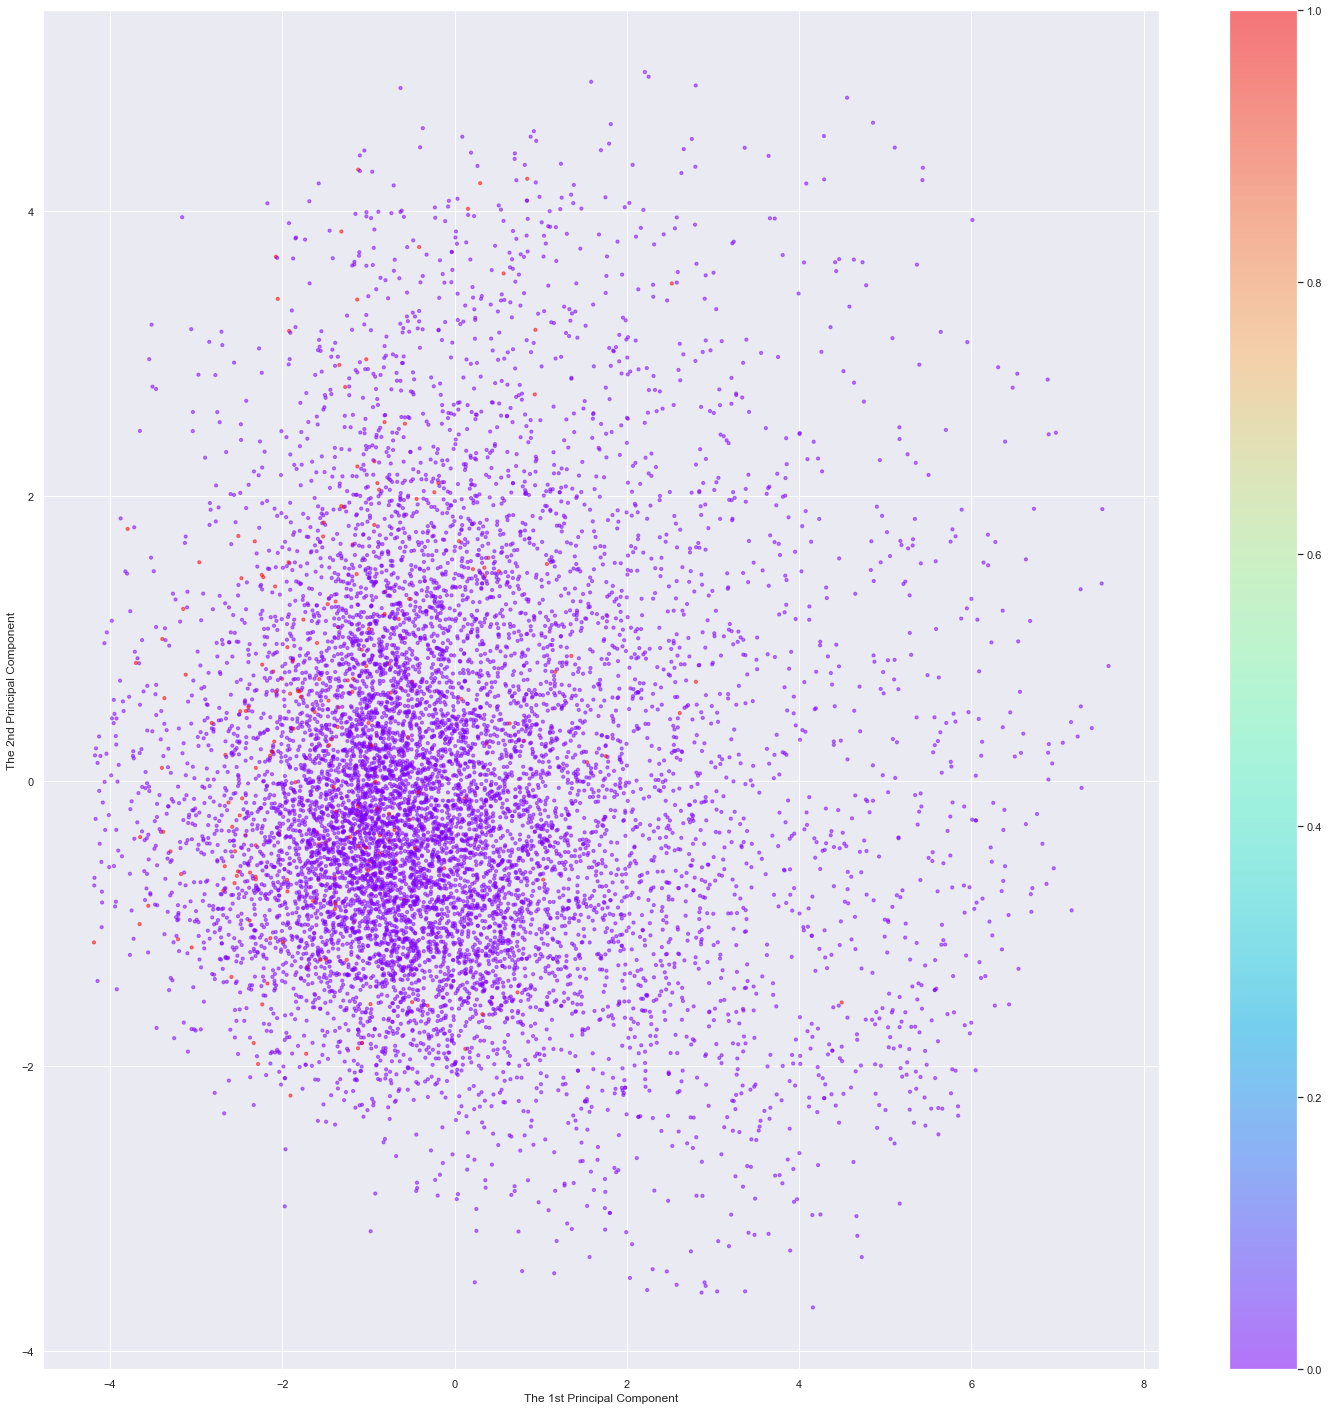

In [27]:
types=pd.Categorical(df["class"])
types
#plot class column with 2
plt.scatter(principalDataframe.PC1, principalDataframe.PC2,c=types.codes,  cmap='rainbow', s=10, alpha=0.5)
plt.xlabel("The 1st Principal Component")
plt.ylabel("The 2nd Principal Component")
plt.colorbar()

# TSNE Components

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


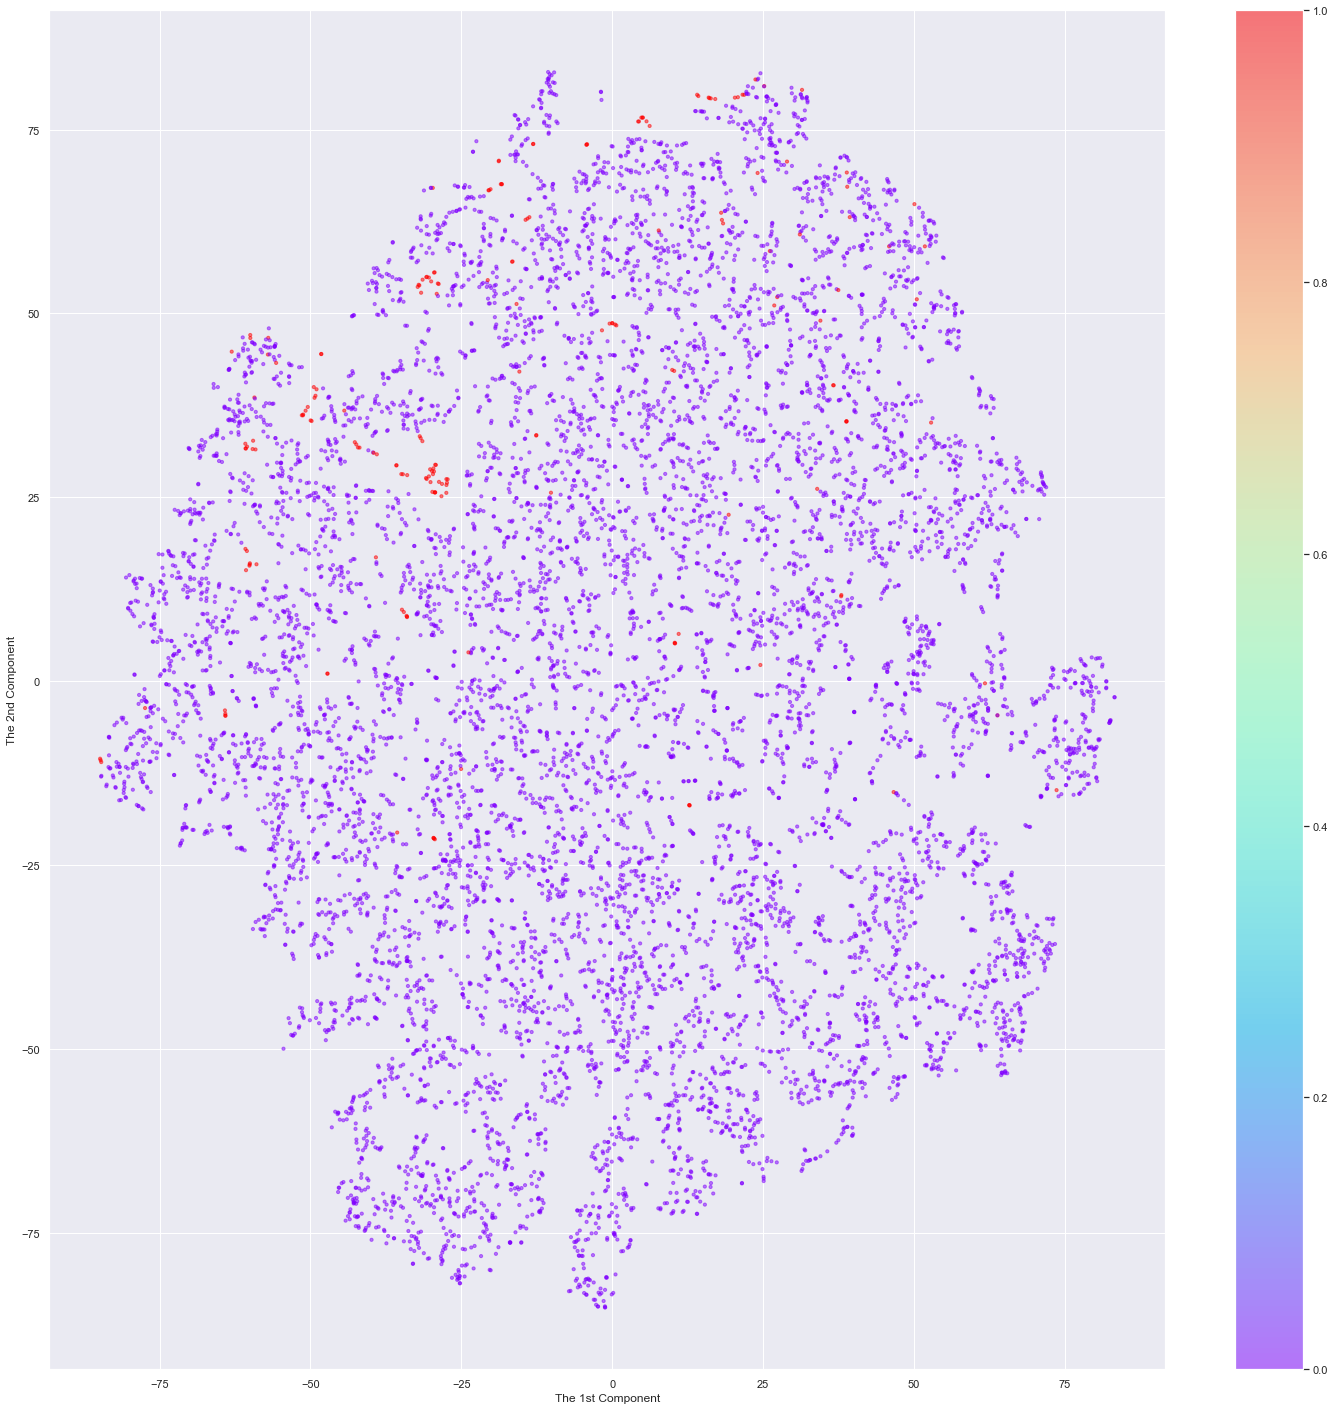

In [28]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tsneD=tsne.fit_transform(XPCA)
principalDataframe = pd.DataFrame(data = tsneD, columns = ['PC1', 'PC2'])

plt.scatter(principalDataframe.PC1, principalDataframe.PC2,c=types.codes,  cmap='rainbow', s=10, alpha=0.5)
plt.xlabel("The 1st Component")
plt.ylabel("The 2nd Component")
plt.colorbar()

When comparing TSNE and PCA TSNE shows more clear classification points than PCA. PCA is more distributed than TSNE. TSNE takes a more time to process.

# Machine Learning Models

In [29]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.linear_model import LogisticRegression
from collections import Counter

#Set the features to the X
X= df.iloc[: , :64]
#Set the target value to the y
y=df.iloc[: ,64:65]

#Spliting the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=2)

logre = LogisticRegression().fit(X_train,y_train.values.ravel())
y_pred = logre.predict(X_test)

print('Confusion matrix')
print(confusion_matrix(y_test, y_pred))

#.values.ravel() is used because it gets red error message off. The results don't change
RsquaredCV=cross_val_score(logre, X_train, y_train.values.ravel(), cv=5).mean()

print("Logistic Regression score:", logre.score(X_test, y_test.values.ravel()))
print("CV score..........", RsquaredCV)
#good that Cross validation score and logistic regression score are almost same but Logistic regression score should be higher. The model might overfit

Confusion matrix
[[1954    0]
 [  46    0]]
Logistic Regression score: 0.977
CV score.......... 0.9802500000000001


Feature: 0, Score: -0.48181
Feature: 1, Score: 0.66793
Feature: 2, Score: -0.06827
Feature: 3, Score: 0.06060
Feature: 4, Score: -0.03268
Feature: 5, Score: -0.08781
Feature: 6, Score: -0.05238
Feature: 7, Score: 0.00446
Feature: 8, Score: -0.43399
Feature: 9, Score: -0.50825
Feature: 10, Score: 0.43937
Feature: 11, Score: 0.19539
Feature: 12, Score: -0.02641
Feature: 13, Score: -0.05798
Feature: 14, Score: -0.29339
Feature: 15, Score: -0.45107
Feature: 16, Score: -0.32392
Feature: 17, Score: -0.06694
Feature: 18, Score: -0.29189
Feature: 19, Score: 0.67699
Feature: 20, Score: 0.00195
Feature: 21, Score: -1.18291
Feature: 22, Score: -0.15093
Feature: 23, Score: 2.81767
Feature: 24, Score: -1.49366
Feature: 25, Score: -1.26453
Feature: 26, Score: 0.00445
Feature: 27, Score: 0.07300
Feature: 28, Score: 0.17548
Feature: 29, Score: 0.02351
Feature: 30, Score: 0.18515
Feature: 31, Score: 0.13579
Feature: 32, Score: -0.70594
Feature: 33, Score: 2.36037
Feature: 34, Score: -0.87564
Feature: 3

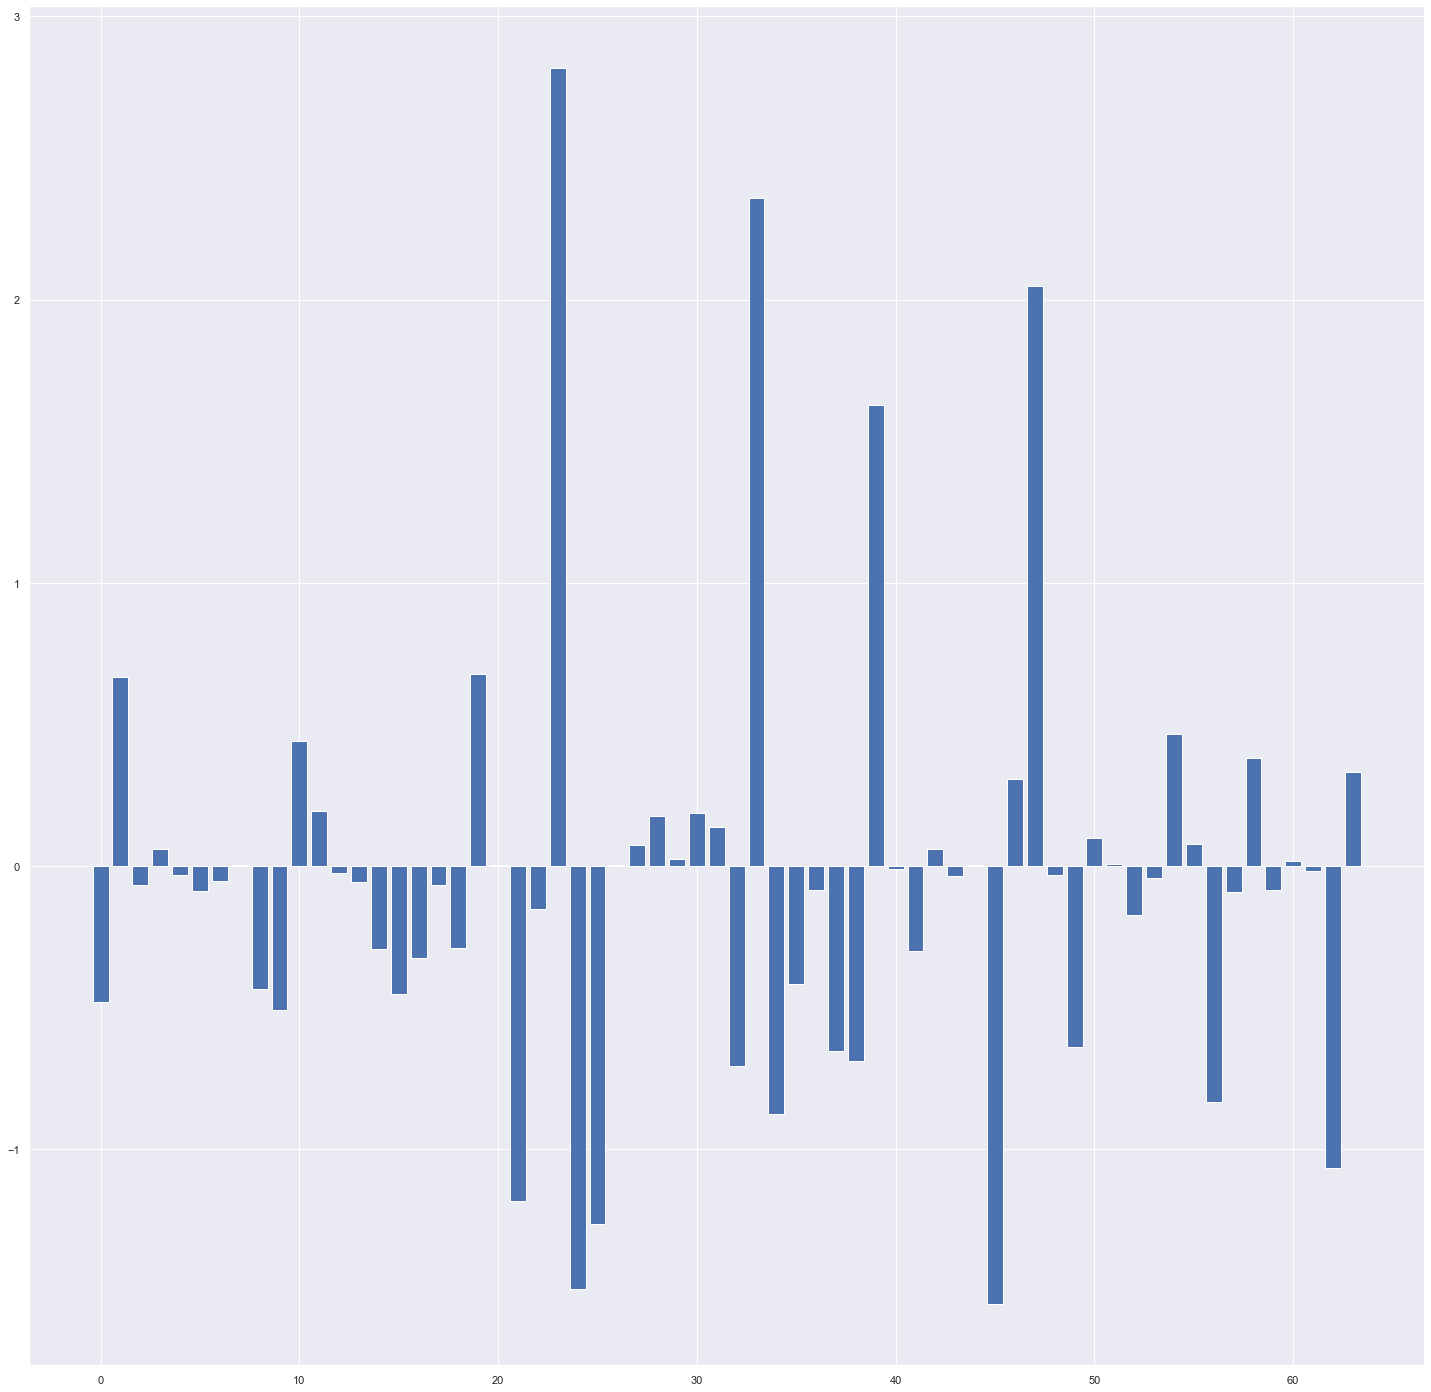

In [30]:
# define the model
#logre from above
# fit the model
#done above
# get importance
importance = logre.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can try to build a new model with only important features 19, 23, 33, 39 & 47<br />
attr19 - gross profit / sales<br />
attr23 - net profit / sales<br />
attr33 - operating expenses / short-term liabilities<br />
attr39 - profit on sales / sales<br />
attr47 - (inventory * 365) / cost of products sold

In [31]:

#Set the features to the X
X_new= df.iloc[: ,[ 9, 23, 33, 39 , 47]]
#the target value is the same y
y_new=df.iloc[: ,64:65]
#Spliting the dataset into train set and test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size = 0.20,random_state=2)


logreNew = LogisticRegression().fit(X_train_new,y_train_new.values.ravel())
y_pred_new = logreNew.predict(X_test_new)

print('confusion matrix')
print(confusion_matrix(y_test, y_pred_new))


RsquaredCV=cross_val_score(logreNew, X_new, y_new.values.ravel(), cv=5).mean()
RsquaredTR=logreNew.score(X_new,y_new)
print("Logistic Regression score:", logreNew.score(X_test_new, y_test_new))
print("CV score..........", RsquaredCV)



confusion matrix
[[1954    0]
 [  46    0]]
Logistic Regression score: 0.977
CV score.......... 0.9796999999999999


Score is similar even though I dropped all the columns except 5.
Model could overfit because CV score is higher than the test score

Feature: 0, Score: -4.17858
Feature: 1, Score: 0.33164
Feature: 2, Score: 0.62687
Feature: 3, Score: -1.21413
Feature: 4, Score: -0.69182


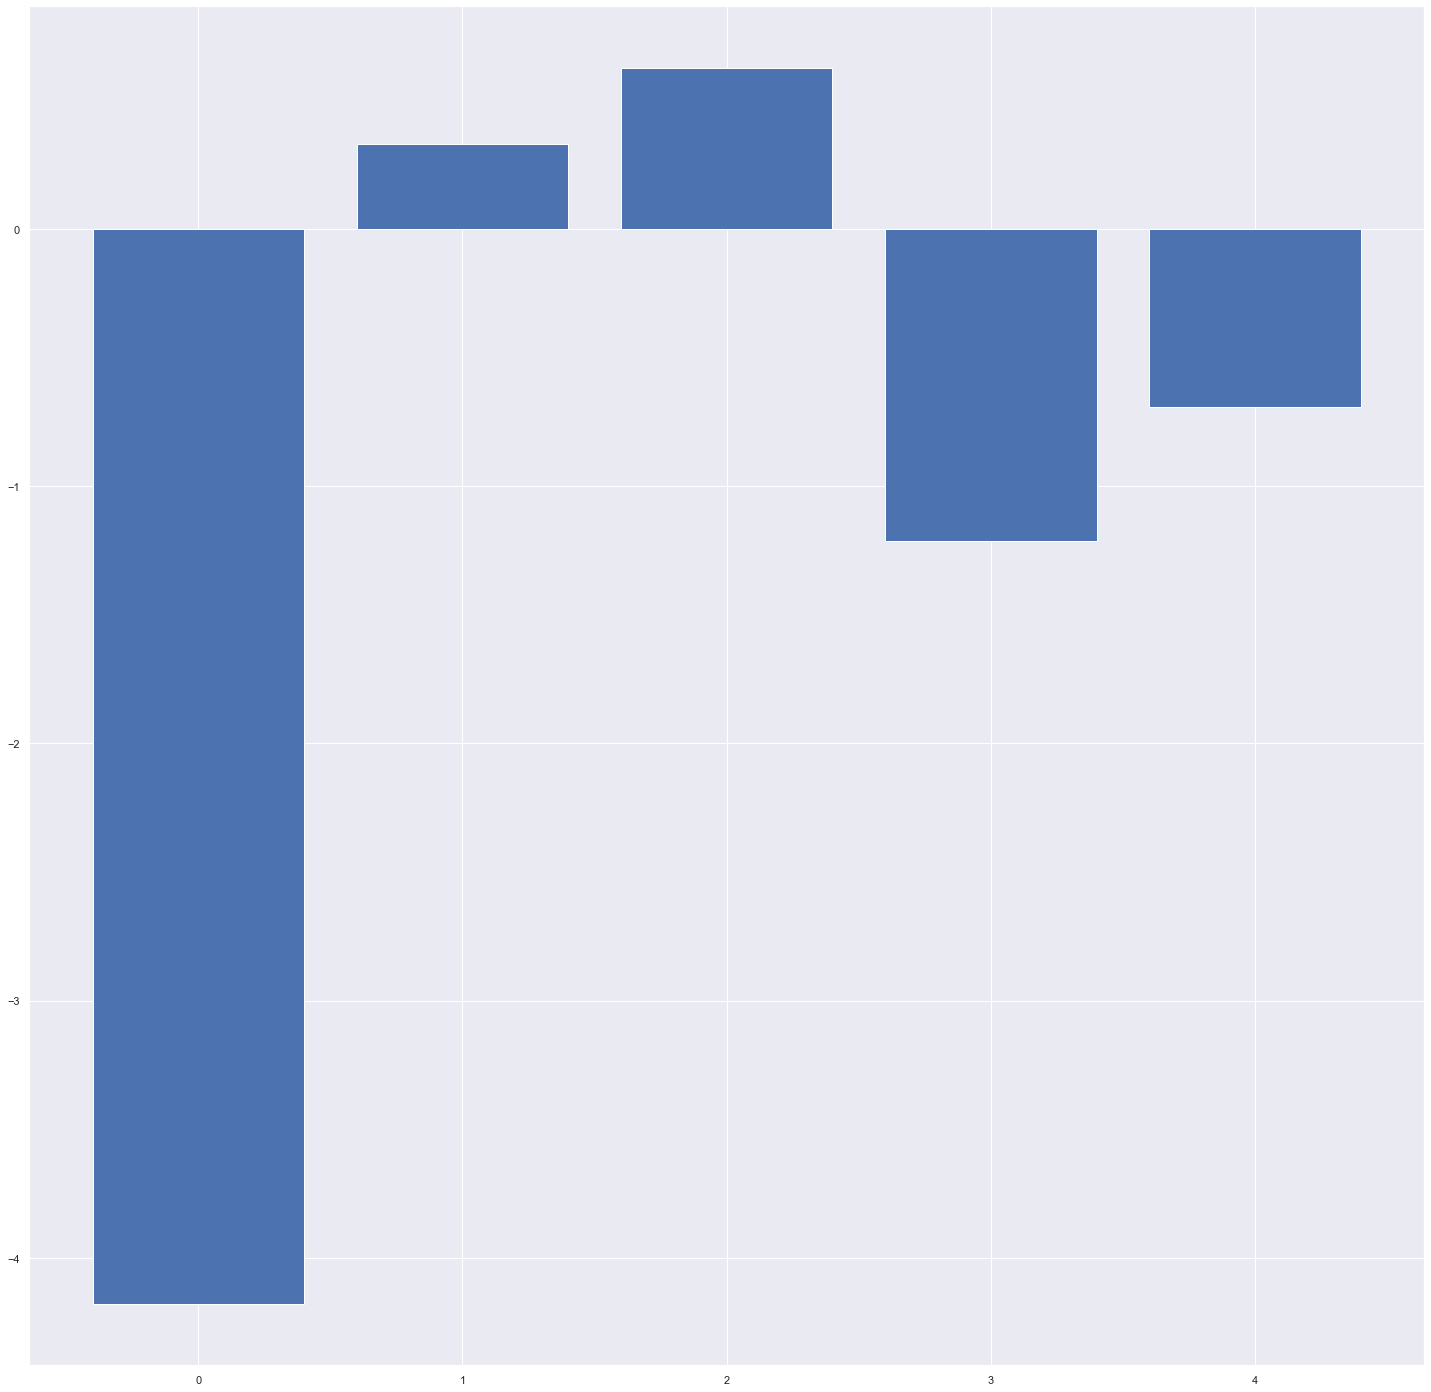

In [32]:
# define the model
#logreNew from above
# fit the model
#done above
# get importance
importance = logreNew.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The importance of the features has changed.

# MLP Regressor

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score



In [34]:
#Set the features to the X_ANN
X_ANN= df.iloc[: , :64]
#Set the target value to the target_ANN
target_ANN =df.iloc[: ,64:65]

In [35]:
#MLP regressor does the training itself
%time predictorMLP=MLPRegressor((4,1000),random_state=2, max_iter=1000).fit(X_ANN, target_ANN.values.ravel())

CPU times: user 26 s, sys: 6.88 s, total: 32.9 s
Wall time: 5.85 s


In [36]:
%time y_predMLP=predictorMLP.predict(X_ANN)
accuracyMLP=r2_score(target_ANN, y_predMLP)
#accuracyScore=MLPR.score(X, y) same as r2-score

accuracyMLP_cv=cross_val_score(predictorMLP, X_ANN, target_ANN.values.ravel(), cv=5).mean()
print("Prediction accuracy in training set is", accuracyMLP)
print("Prediction accuracy in cv is          ", accuracyMLP_cv)

CPU times: user 88.2 ms, sys: 25.6 ms, total: 114 ms
Wall time: 21.3 ms
Prediction accuracy in training set is 0.19802734788782428
Prediction accuracy in cv is           0.07167429048544456


Accuracy is bad because this is not a regression problem!! 
# Let's try MLPClassifier

In [37]:
#import MLPClassifier
from sklearn.neural_network import MLPClassifier

In [38]:
#Spliting the dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ANN,target_ANN.values.ravel(),test_size = 0.20,random_state=2)
#make ths modeö
clf = MLPClassifier(random_state=2, max_iter=500).fit(X_train, y_train)


print('Classifier score: ',clf.score(X_test, y_test))
accuracyMLC_cv=cross_val_score(clf, X_ANN, target_ANN.values.ravel(), cv=5).mean()
print("Prediction accuracy in cv is: ", accuracyMLC_cv)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier score:  0.9775


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Prediction accuracy in cv is:  0.9795


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
from sklearn.ensemble import RandomForestClassifier
#Model 
rfc = RandomForestClassifier(n_estimators= 200)

# fit the predictor and target
rfc.fit(X_train,y_train)

# predict
rfc_y_predict = rfc.predict(X_test)


# check performance

rfc_RsquaredCV = cross_val_score(rfc, X_ANN, target_ANN.values.ravel(), cv=5).mean()
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, rfc_y_predict))
print("CV score:", rfc_RsquaredCV)


Random Forest Classifier Accuracy: 0.9755
CV score: 0.9794


Good accuracy, MLP Classifier had the best accuracy 97,75% Logistic regression had 97,7% And RandomForest had 97,55%. There might be overfitting.

# Predict the bankruptcy

In [40]:
#Test company and parameters
test_company1=[[1,1,1,1,5]]
test_company2=[[-11,-1,-1,-1,5]]

In [41]:
#Use logreNew odel because it needs only 5 parameters. 
logreNew.predict(test_company1)
#No bankruptcy

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [42]:
logreNew.predict_proba(test_company1)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.99994202e-01, 5.79787617e-06]])

In [43]:
#The probability is alost 100% that the company is not going to bankruptcy

Let's test another test_company2

In [44]:
logreNew.predict(test_company2)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [45]:
logreNew.predict_proba(test_company2)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0., 1.]])

The other company has gone to bankruptcy with those parameters that are not good. This shows that the model can also predict bad outcomes. i used only this logreNew model to predict because it needded only 5 attributes and other models needed all attributes. 

For further research and model building unneccesary features could be removed when the correlations are known better. 